# Learning curve plot - random world

For any mouse and any selection of days (sessions) this script will plot learning curves of performance (per day).
Performance metrics are average fraction of correct transitions (compared to a chance estimation based on lick rate at every landmark) per session.

In [2]:
from aeon.io.reader import Csv, Reader
import aeon.io.api as aeon
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import importlib as imp
import parse_bonsai_functions
imp.reload(parse_bonsai_functions)

<module 'parse_bonsai_functions' from '/Users/sandrareinert/Library/Mobile Documents/com~apple~CloudDocs/Documents/Postdoc_SWC/Code/Bonsai_ABCD/parse_bonsai_functions.py'>

In [3]:
mouse_id = "003"
dates = ["20260113","20260114","20260115"] #just a few sample dates to test the scripts
root = "/Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/"

In [4]:
num_rewards = []
av_performance = []
av_ctrl_performance = []

for date in dates:
    session_path = parse_bonsai_functions.find_base_path(mouse_id, date, root)
    print("-----")
    print(f"Analysing session: {session_path}")

    #load settings and session files
    ses_settings, ses_rig_settings = parse_bonsai_functions.load_settings(session_path)
    sess_dataframe = parse_bonsai_functions.load_data(session_path)
    sess_dataframe = parse_bonsai_functions.threshold_lick_speed(sess_dataframe, ses_settings['velocityThreshold'])
    num_rewards.append(sess_dataframe['Rewards'].notna().sum())

    performance, perf_a, perf_b, perf_c = parse_bonsai_functions.calc_seq_fraction(sess_dataframe,ses_settings,test='transition')
    perf_ctrl, perf_a_ctrl, perf_b_ctrl, perf_c_ctrl = parse_bonsai_functions.calc_seq_fraction(sess_dataframe,ses_settings,test='control')

    av_performance.append(performance)
    av_ctrl_performance.append(perf_ctrl)
    



-----
Analysing session: /Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/sub-003/ses-6LM055_date-20260113T180530
-----
Analysing session: /Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/sub-003/ses-6LM056_date-20260114T161448
-----
Analysing session: /Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/sub-003/ses-6LM057_date-20260115T143132


In [9]:
av_performance

[0.29497354497354494, 0.380514705882353, 0.481981981981982]

## Average performance metrics per day

Text(0.5, 1.0, 'Mouse 003 - Performance across days')

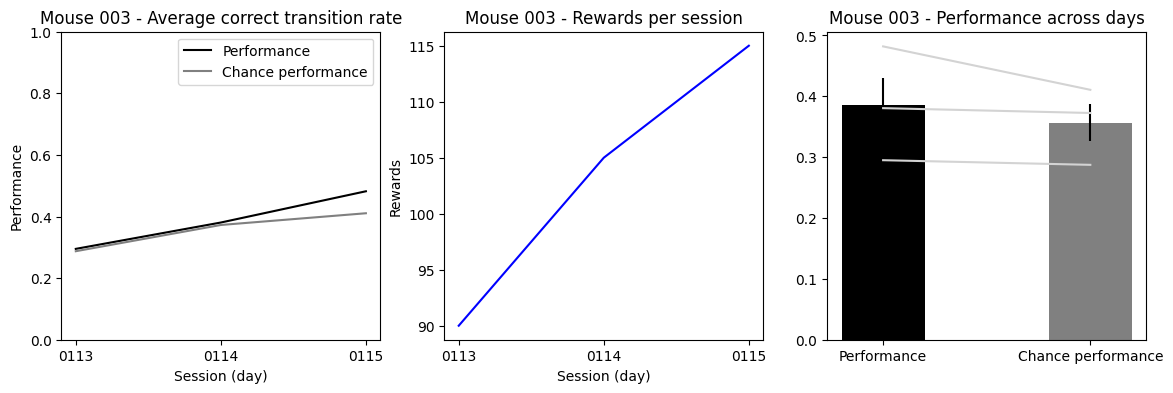

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.plot(av_performance, color='black')
plt.plot(av_ctrl_performance,color='grey')
plt.ylim([0,1])
plt.xlabel('Session (day)')
plt.ylabel('Performance')
plt.xticks(ticks=range(len(dates)), labels=[dates[i][4:] for i in range(len(dates))])
plt.title(f'Mouse {mouse_id} - Average correct transition rate')
plt.legend(['Performance','Chance performance'])
plt.subplot(1,3,2)
plt.plot(num_rewards, color='blue')
plt.xlabel('Session (day)')
plt.ylabel('Rewards')
plt.xticks(ticks=range(len(dates)), labels=[dates[i][4:] for i in range(len(dates))])
plt.title(f'Mouse {mouse_id} - Rewards per session')
plt.subplot(1,3,3)
plt.bar('Performance',np.mean(av_performance), yerr=np.std(av_performance)/np.sqrt(len(av_performance)), color='black', width=0.4, label='Performance')
plt.bar('Chance performance',np.mean(av_ctrl_performance), yerr=np.std(av_ctrl_performance)/np.sqrt(len(av_ctrl_performance)), color='grey', width=0.4, label='Chance performance')
#plot individual data points as lines
plt.plot(['Performance','Chance performance'],[av_performance,av_ctrl_performance], color='lightgrey')
plt.title(f'Mouse {mouse_id} - Performance across days')